In [8]:
# Daily Challenge : Advanced Data Analysis and Problem Solving with SciPy and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
df = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [9]:
df.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [10]:
df['Temperature'].mean()
df['Temperature'].std()
df['Pressure'].mean()
df['Pressure'].std()
df['Chemical Concentration'].mean()
df['Chemical Concentration'].std()
df['Temperature_norm'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()
df['Pressure_norm'] = (df['Pressure'] - df['Pressure'].mean()) / df['Pressure'].std()
df['Chemical Concentration_norm'] = (df['Chemical Concentration'] - df['Chemical Concentration'].mean()) / df['Chemical Concentration'].std()
df_clean = df.drop(columns = ['Temperature', 'Pressure', 'Chemical Concentration'])
df_clean.head()

,Time,Temperature_norm,Pressure_norm,Chemical Concentration_norm
0,0.0000,0.253054,1.444895,-0.206291
1,0.1001,0.071093,1.468476,-0.187444
2,0.2002,0.160811,1.375573,0.101064
3,0.3003,0.346135,1.412122,0.004856
4,0.4004,0.302714,1.420026,0.170552


Data normalization - calculating mean and std, normalizing and the dropping original columns. Its allows us to compare different variables on the same scale


Max temperature: 1.693152096662372
Min temperature: -1.700716328118932


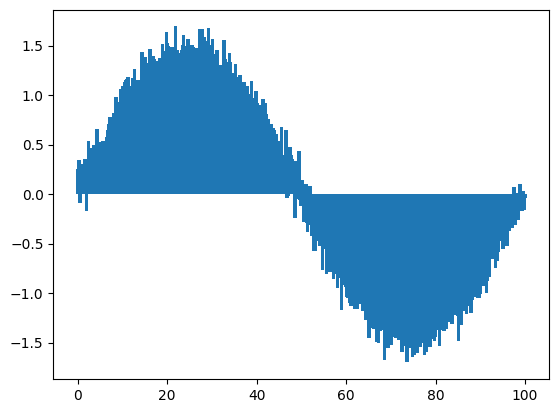

In [57]:
temp_max = df['Temperature_norm'].max()
temp_min = df['Temperature_norm'].min()
print(f"Max temperature: {temp_max}")
print(f"Min temperature: {temp_min}")
plt.bar(df['Time'], df['Temperature_norm'])
plt.show()

we can see outliers anddynamics of changes from positive to negative temperatures with a peak of 1.5 and -1.5

Max pressure: 1.5797723410361633
Min pressure: -1.6016784345689465


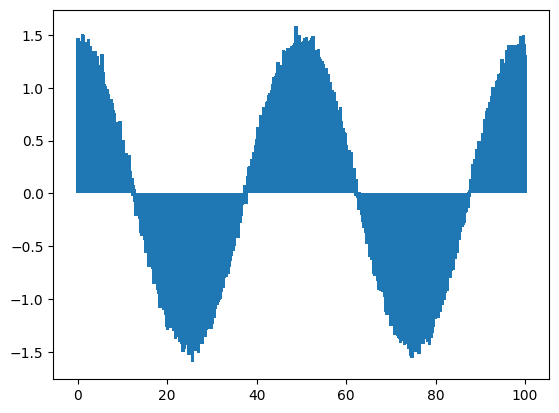

In [58]:
press_max = df['Pressure_norm'].max()
press_min = df['Pressure_norm'].min()
print(f"Max pressure: {press_max}")
print(f"Min pressure: {press_min}")
plt.bar(df['Time'], df['Pressure_norm'])
plt.show()

at the same time, the pressure changes more often and more rapidly over the same period of time, which means it does not depend on temperature values

Max chemical concentration: 1.7382526959539832
Min chemical concentration: -1.6919152420560153


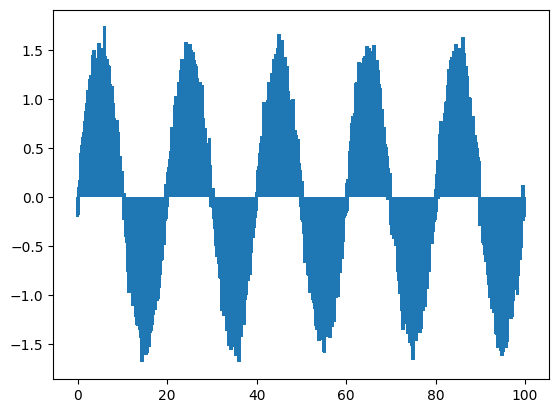

In [59]:
conc_max = df['Chemical Concentration_norm'].max()
conc_min = df['Chemical Concentration_norm'].min()
print(f"Max chemical concentration: {conc_max}")
print(f"Min chemical concentration: {conc_min}")
plt.bar(df['Time'], df['Chemical Concentration_norm'])
plt.show()

here the changes are even more rapid over the same periods of time, outliers are also visible, and the graph looks like normal distribution

I checked how wide the range is in the numerical columns to understand whether logarithmic scaling is necessary

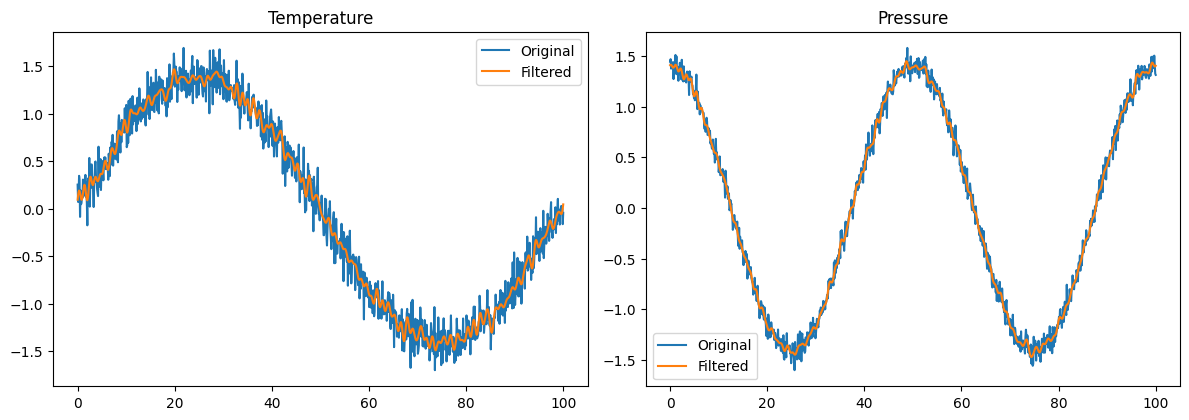

In [21]:
# Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
fft_temp = np.fft.fft(df['Temperature_norm'])
fft_press = np.fft.fft(df['Pressure_norm'])
frequency = np.fft.fftfreq(len(time), d=(time[1] - time[0]))

cutoff_frequency = 1
fft_temp_filtered = fft_temp.copy()
fft_press_filtered = fft_press.copy()
fft_temp_filtered[np.abs(frequency) > cutoff_frequency] = 0
fft_press_filtered[np.abs(frequency) > cutoff_frequency] = 0

temp_filtered = np.fft.ifft(fft_temp_filtered)
press_filtered = np.fft.ifft(fft_press_filtered)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(time, df['Temperature_norm'], label='Original')
plt.plot(time, temp_filtered.real, label='Filtered')
plt.title('Temperature')
plt.legend()
plt.subplot(2,2,2)
plt.plot(time, df['Pressure_norm'], label='Original')
plt.plot(time, press_filtered.real, label='Filtered')
plt.title('Pressure')
plt.legend()
plt.tight_layout()
plt.show()

we see that the temperature changes from a positive peak to a negative peak in 600 seconds - 10 minutes. Pressure in 300 seconds - 5 minutes

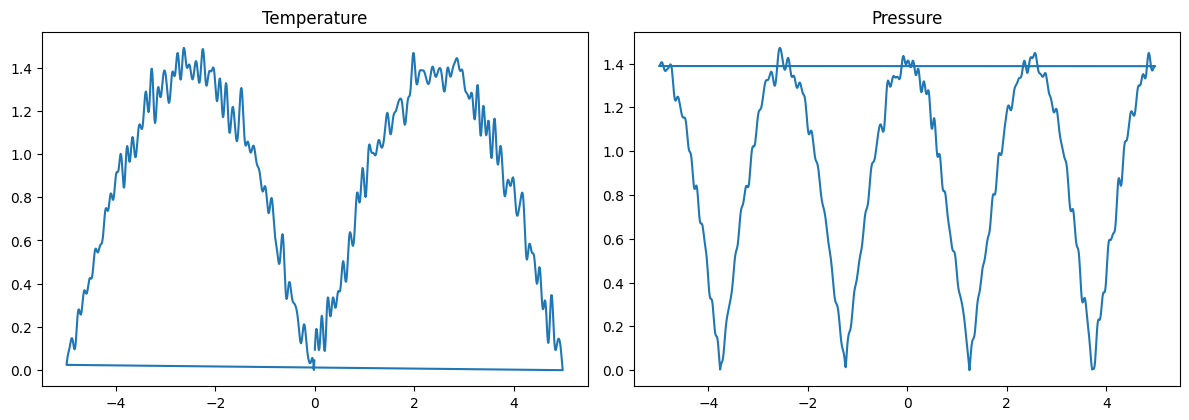

In [25]:
temp_centred = temp_filtered - np.mean(temp_filtered)
press_centred = press_filtered - np.mean(press_filtered)
amplitude_temp = np.abs(temp_centred)
amplitude_press = np.abs(press_centred)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(frequency, amplitude_temp)
plt.title('Temperature')
plt.subplot(2,2,2)
plt.plot(frequency, amplitude_press)
plt.title('Pressure')
plt.tight_layout()
plt.show()

In [28]:
df_clean.describe()

,Time,Temperature_norm,Pressure_norm,Chemical Concentration_norm
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,50.000000,2.273737e-16,1.421085e-17,-4.263256e-16
std,28.910854,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.700716e+00,-1.601678e+00,-1.691915e+00
25%,25.000000,-1.004320e+00,-9.984525e-01,-9.841460e-01
50%,50.000000,8.753899e-03,-5.819063e-03,-1.307186e-02
75%,75.000000,1.005051e+00,9.876893e-01,9.803748e-01
max,100.000000,1.693152e+00,1.579772e+00,1.738253e+00


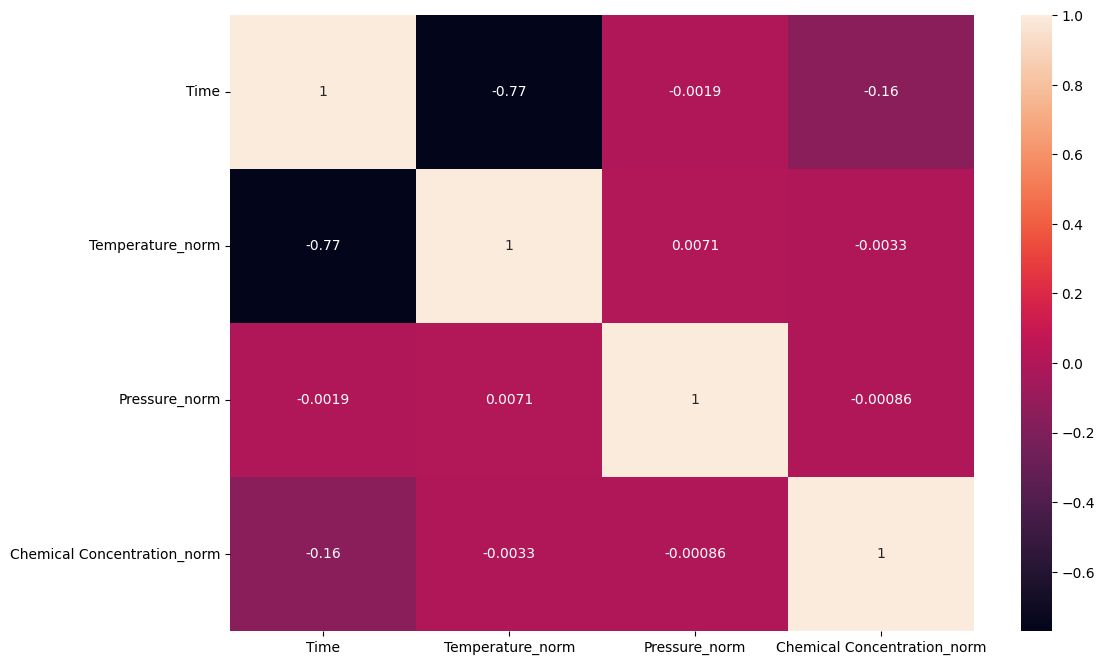

In [31]:
correlartion = df_clean.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlartion, annot=True)
plt.show()

the correlation between time and temperature is negative. between temperature and pressure is small but positive, these indicators do not affect each other, but increase together in one period of time. There is no strong correlation between temperature, pressure and chemical concetration, noone influences each other

In [43]:
corr, p_value = stats.pearsonr(df_clean['Temperature_norm'], df_clean['Pressure_norm'])
print(f"Correlation between Temperature and Pressure: {corr}, P_value: {p_value}")

Correlation between Temperature and Pressure: 0.007112292067251669, P_value: 0.8222655963580461


There is no significant changes, no linear correlation

In [46]:
corr, p_value = stats.pearsonr(df_clean['Temperature_norm'], df_clean['Chemical Concentration_norm'])
print(f"Temperature and Chemical Concentration: {corr}, P_value: {p_value}")

Temperature and Chemical Concentration: -0.003277070166048377, P_value: 0.9175655752792369


There is no significant changes, no linear correlation

Slope: -0.02665767178842865, Intercept: 1.3328835894214326


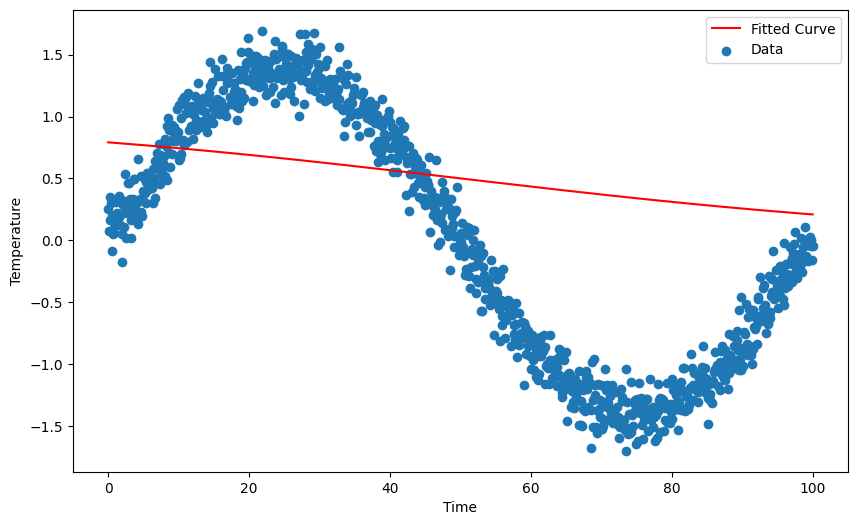

In [53]:
from sklearn.linear_model import LinearRegression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Time'],df_clean['Temperature_norm'])
print(f"Slope: {slope}, Intercept: {intercept}")
x = df_clean['Time']
y = expit(x*slope + intercept)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'r', label='Fitted Curve')
plt.scatter(df_clean['Time'], df_clean['Temperature_norm'], label='Data')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

temperature is decreasing for 0,026 for each time period, from starting point (time 0) where temperature is 1.3

Slope: -6.732062806329118e-05, Intercept: 0.003366031403164573


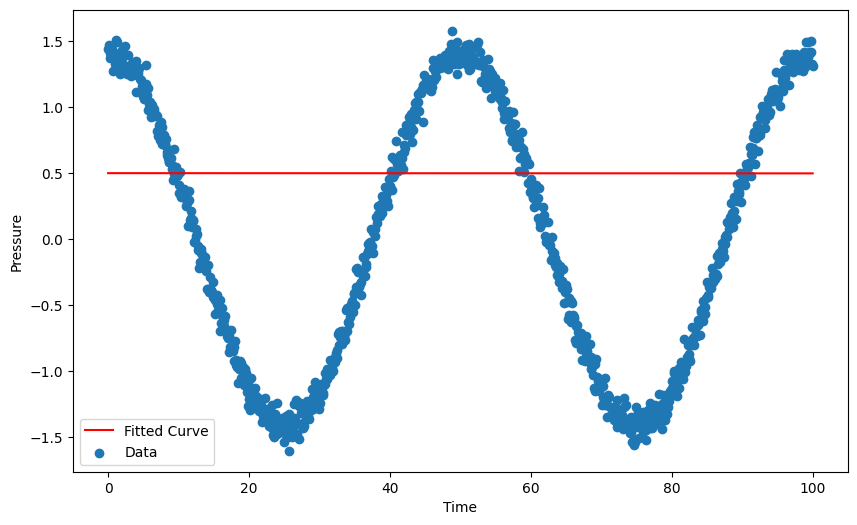

In [52]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Time'],df_clean['Pressure_norm'])
print(f"Slope: {slope}, Intercept: {intercept}")
x = df_clean['Time']
y = expit(x*slope + intercept)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'r', label='Fitted Curve')
plt.scatter(df_clean['Time'], df_clean['Pressure_norm'], label='Data')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()

Slope: -0.005399795228896745, Intercept: 0.26998976144483683


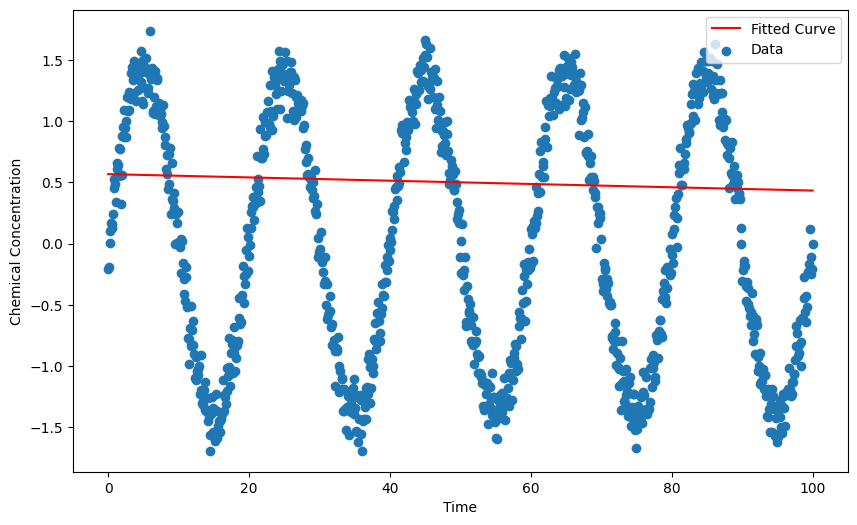

In [50]:
from scipy.special import expit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Time'],df_clean['Chemical Concentration_norm'])
print(f"Slope: {slope}, Intercept: {intercept}")
x = df_clean['Time']
y = expit(x*slope + intercept)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'r', label='Fitted Curve')
plt.scatter(df_clean['Time'], df_clean['Chemical Concentration_norm'], label='Data')
plt.xlabel('Time')
plt.ylabel('Chemical Concentration')
plt.legend()
plt.show()

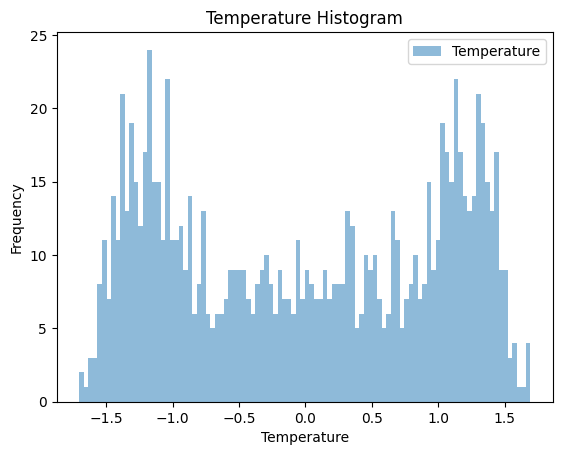

In [63]:
count, bins = np.histogram(df_clean['Temperature_norm'], bins=100)
plt.hist(df_clean['Temperature_norm'], bins=bins, alpha=0.5, label='Temperature')
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

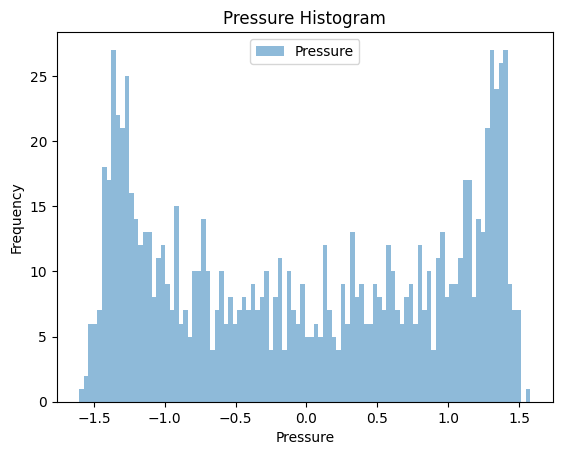

In [64]:
count, bins = np.histogram(df_clean['Pressure_norm'], bins=100)
plt.hist(df_clean['Pressure_norm'], bins=bins, alpha=0.5, label='Pressure')
plt.title('Pressure Histogram')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

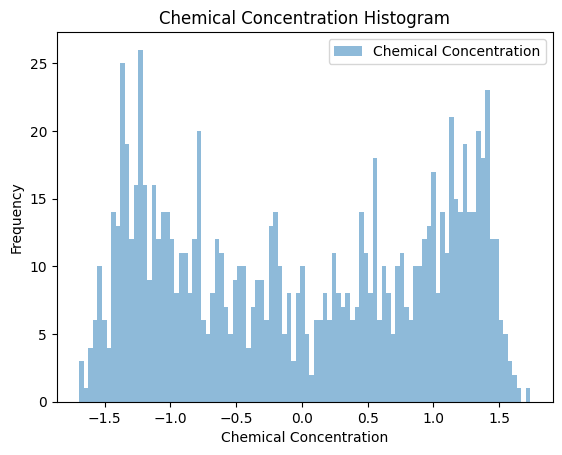

In [65]:
count, bins = np.histogram(df_clean['Chemical Concentration_norm'], bins=100)
plt.hist(df_clean['Chemical Concentration_norm'], bins=bins, alpha=0.5, label='Chemical Concentration')
plt.title('Chemical Concentration Histogram')
plt.xlabel('Chemical Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

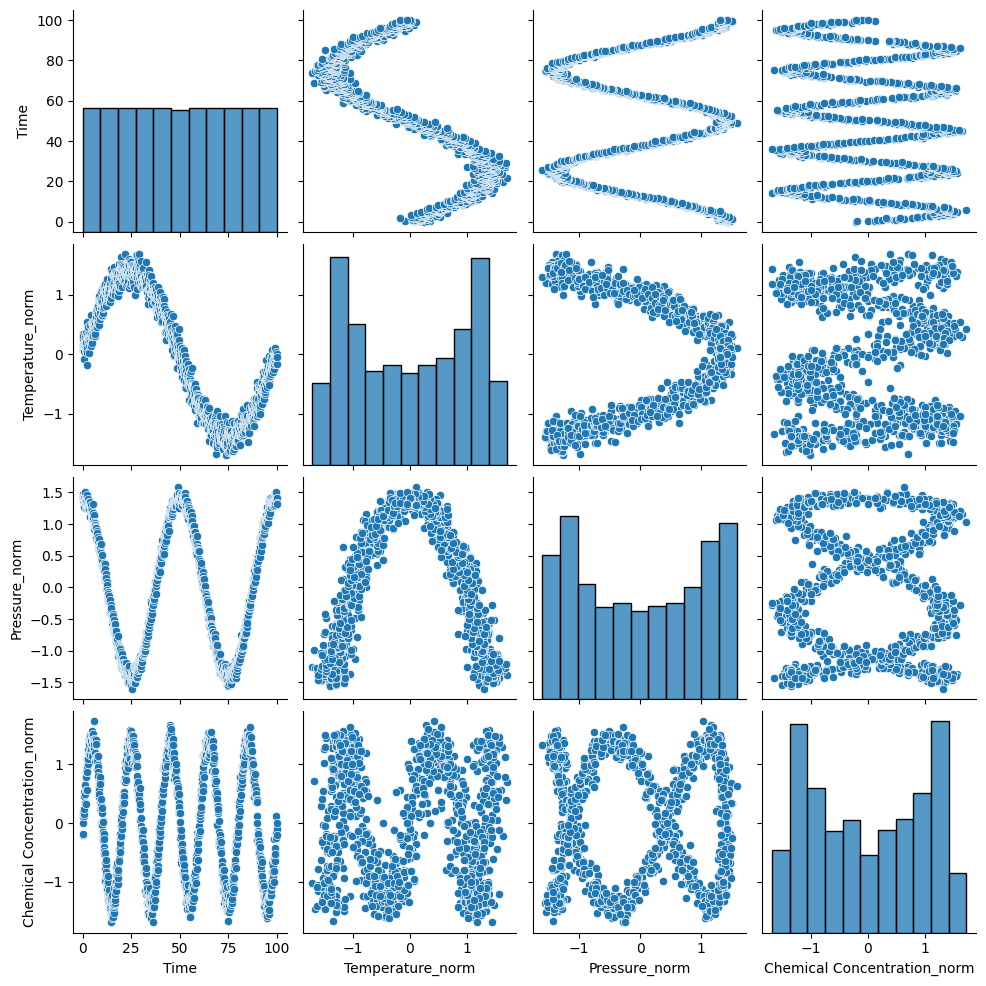

In [66]:
sns.pairplot(df_clean)
plt.show()

Since the indicators do not influence each other, we cannot build a regression model. If temperature significantly affects pressure and chemical concentration, this could be valuable in industrial or environmental monitoring, where controlling temperature could help stabilize pressure or concentrations in processes.
Fourier analysis could help in detecting periodic trends, useful for forecasting in weather patterns or industrial processes